# Assignment 1

## C. Unsupervised Learning (8Points)
### C.I. k-means Clustering (4.5 points)

1) (0.5 points) Study k-means and briefly describe how this model is trained. (Aim for 3 sentences.)

k-means aims to minimize the distance from each point to its cluster centroid. It starts by initializing cluster centers and assigns points to the nearest center, next it recalculates the centroids. This process repeats until reaching a set number of iterations or one has a stable cluster result.

2) (0.5 points) Use scikit-learn to run k-means on the dataset in iris.csv. Produce scatter plots of
each pair of attributes, colored by the k-means clusters. (You can use seaborn.pairplot.)

In [47]:
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix
import numpy as np

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


c:\Users\David\miniconda3\envs\iml_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


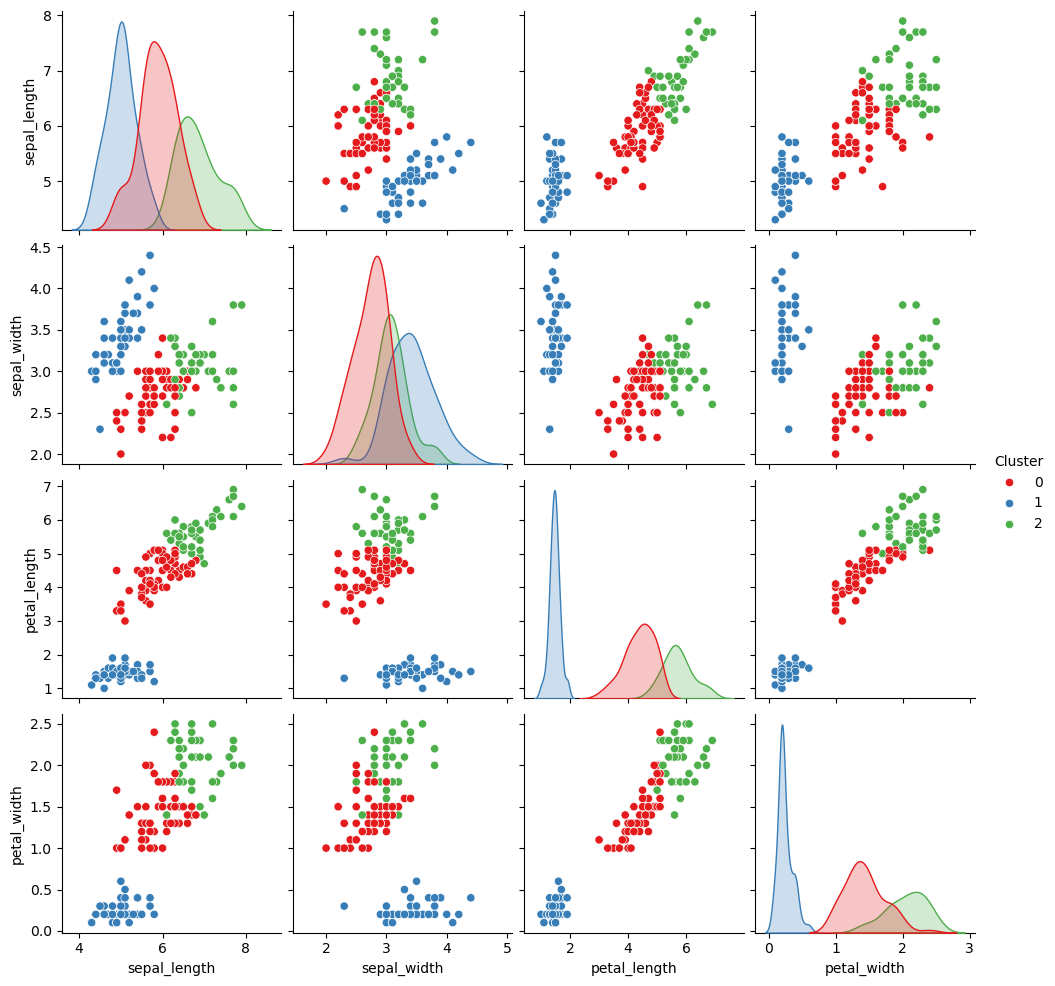

In [41]:
# Import iris.csv
iris_df = pd.read_csv('iris.csv')

# Check if the dataset is correctly loaded
print(iris_df.head())

# n_clusters = 3, since there are 3 species in iris.csv
kmeans = KMeans(n_clusters = 3, random_state = 0)

# Fit kmeans to the dataset
kmeans.fit(iris_df.iloc[:,:-1])

# Add cluster labels
iris_df['Cluster'] = kmeans.labels_

# Scatter for each pair of attributes
sns.pairplot(iris_df, hue='Cluster', palette = 'Set1')
plt.show()


3) (0.5 points) Compute the average silhouette score for each cluster. Explain what this measures.

In [42]:
score = silhouette_score(iris_df.iloc[:, :-2], iris_df['Cluster'])  
print(f'Average Silhouette Score: {score}')


Average Silhouette Score: 0.5509643746707441


4) (1.0 point) Compare the clusters inferred by k-means with the data labels using a confusion matrix.
Did k-means accurately distinguish the three species?

In [43]:
# True labels are in the species column of iris.csv
true_labels = iris_df['species']
predicted_lb = iris_df['Cluster']

species = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
pred_lb = predicted_lb.map(species)

matrix = confusion_matrix(true_labels, pred_lb)
print(f'Confusion Matrix: \n{matrix}')

Confusion Matrix: 
[[ 0 50  0]
 [47  0  3]
 [14  0 36]]


#### Did k-means accurately distinguish the three species?

Each row represents a species, and the columns represent the clusters:

First row Setosa: all the samples are in one groupe, the second cluster

Second row Versicolor: 47 samples in first cluster, 3 samples in third cluster

Third row Virginica: 14 samples in first cluster, 36 samples in third cluster

k-means distinguished Setosa very well, but Versicolor and Virginica not so good, since they have some overlapping clusters.

5) (1.0 point) unknown species.csv contains data on 6 flowers of unknown species. Use your trained
k-means model to predict which cluster these new flowers belong to.

In [46]:
col = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
unknown_species_df = pd.read_csv('unknown_species.csv')

predictions = kmeans.predict(unknown_species_df[col])

# 0 Setosa, 1 Versicolor, 2 Virginica
print(predictions)

[1 0 1 2 2 0]


6) (1.0 point) Implement k-means from scratch and test your implementation on the iris dataset.

In [51]:
iris_data = iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values.astype(float)
k = 3

np.random.seed(3)
init_centroids = iris_data[np.random.choice(iris_data.shape[0],k, replace=False)]

def assign_clusters(data,centroids):
    distances = np.linalg.norm(data[:,np.newaxis] - centroids, axis= 2)
    return np.argmin(distances, axis= 1)

def update_centroids(data, labels, k):
    return np.array([data[labels == i].mean(axis=0) for i in range(k)])

centroids = init_centroids
for i in range(100):    
    labels = assign_clusters(iris_data, centroids)
    new_centroids = update_centroids(iris_data, labels, k)

    if np.all(centroids == new_centroids):
        break
    centroids = new_centroids

print("Final centroids:\n", centroids)
print("Cluster labels:\n", labels)

Final centroids:
 [[5.006      3.418      1.464      0.244     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]
 [6.85384615 3.07692308 5.71538462 2.05384615]]
Cluster labels:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


### C.II. DBScan and PCA (3.5 points)

1. (0.5 points) Study DBScan and briefly describe how this algorithm works. (Aim for three sentences.)

DBScan, also known as Density-Based Spatial Clustering of Applicaations with Noise, is a clustering algotihm that groups together points that are closely packed based on a specified distance metric and minimum number of points. It identifies "core points" with a least a minimum number of neighbors within a given radius, "border points" that are reachable from core points but have fewer neighbors, and "noise points" that don't belong to any cluster. Unlike k-means, DBScan does not require specifiying the number of clusters beforehand and can identify clusters of arbitrary shapes, but it may struggle with datasets that have varying densities.

2. (0.5 points) Read the dataset in ulu.csv and apply scikit-learn’s implementation of DBScan to
infer clusters. (Keep parameters at their defaults.) How many clusters did you get?

3. (0.5 points) Plot some projections of the data into two dimensions. Color using the clusters inferred
by DBScan. What shapes do you recognize?

4. (1 point) Use PCA to find a two-dimensional projection of maximum variance and plot the data
under this projection. Informally describe what this transformation does. For 3-dimensional data,
what does it do geometrically?

5. (0.5 points) Now run k-means instead of DBScan. Compare their silhouette scores.


6. (0.5 points) Would silhouette scores be a good cost function to learn the interpretable clusters in
this data?

Silhouette scores can be useful for evaluating clustering quality, but they may not be the best cost function for learning interpretable clusters. While they indicate how well-separeted and compact clusters are, they are sensitive to noise and may favor larger clusters, potentially overlooking smaller, meaningful groupings. It's often better to use silhouette scores alongside other metrics and visualizations for more comprehensive assessement.